In [1]:
# LIBRERÍAS
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer

import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

## Fase 1: Exploración y Limpieza


### 1. Exploración Inicial:
1.1. Realiza una exploración inicial de los datos para identificar posibles problemas como valores nulos, atípicos o datos faltantes en las columnas relevantes.


1.2. Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores
nulos y estadísticas básicas de las columnas involucradas.

In [2]:
# Abrimos el archivo "Customer_Flight_Activity" y lo exploramos con los métodos .head(), .tail() y .sample()

df_activity = pd.read_csv("Customer_Flight_Activity.csv", index_col = None)
df_activity.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
54009,277139,2017,4,1,1,2,1226,122.00,0,0
226679,472356,2018,2,0,0,0,0,0.00,0,0
220594,489628,2018,2,3,0,3,255,31.25,0,0
256899,663746,2018,10,4,0,4,1488,148.00,0,0
235073,566991,2018,1,5,5,10,2230,223.00,515,42


In [3]:
# Hacemos lo mismo con el archivo Customer_Loyalty_History

df_loyalty = pd.read_csv("Customer_Loyalty_History.csv", index_col = None)
df_loyalty.sample(5)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
15880,502353,Canada,Quebec,Tremblant,H5Y 2S9,Female,College,NaN,Single,Star,12495.74,Standard,2018,5,NaN,NaN
10805,921705,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,76211.0,Single,Star,2505.42,Standard,2016,8,NaN,NaN
13819,442525,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,59709.0,Married,Star,5597.12,Standard,2015,4,NaN,NaN
13735,543460,Canada,Quebec,Tremblant,H5Y 2S9,Male,College,NaN,Married,Star,5504.14,Standard,2013,2,NaN,NaN
145,509513,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,4121.25,Standard,2012,12,NaN,NaN


In [4]:
# Utilizamos una función básica de exploración que hemos creado previamente

def exploracion_dataframe (dataframe):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Número de filas: {dataframe.shape[0]}. Número de columnas: {dataframe.shape[1]}")
    print("\n ..................... \n")

    print(f"Número de duplicados: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    print("Porcentaje de nulos:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Tipos de columnas:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    print("\n ..................... \n")
    print("Valores de las columnas categóricas: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()))    
    
    print("\n ..................... \n")
    print("Valores de las columnas numéricas: ")
    dataframe_numericas = dataframe.select_dtypes(include='number')
    
    for col in dataframe_numericas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()))    

    print("\n ..................... \n")
    descripcion = dataframe.describe().T
    print(f"Principales valores estadísticos son:")
    print(descripcion.to_string())


In [5]:
# Llamamos a la función para explorar el primer dataframe: df_activity

exploracion_dataframe(df_activity)

Número de filas: 405624. Número de columnas: 10

 ..................... 

Número de duplicados: 1864

 ..................... 

Porcentaje de nulos:


,%_nulos



 ..................... 

Tipos de columnas:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Valores de las columnas categóricas: 

 ..................... 

Valores de las columnas numéricas: 
La columna LOYALTY NUMBER tiene las siguientes valores únicos:


,Loyalty Number
678205,72
989528,48
373638,48
684889,48
684881,48
...,...
428526,24
428536,24
428565,24
428590,24


La columna YEAR tiene las siguientes valores únicos:


,Year
2017,202812
2018,202812


La columna MONTH tiene las siguientes valores únicos:


,Month
1,33802
9,33802
2,33802
3,33802
11,33802
4,33802
5,33802
7,33802
6,33802
8,33802


La columna FLIGHTS BOOKED tiene las siguientes valores únicos:


,Flights Booked
0,197992
3,18228
11,15705
5,15084
7,14561
8,14357
9,14164
6,13847
2,13641
10,13363


La columna FLIGHTS WITH COMPANIONS tiene las siguientes valores únicos:


,Flights with Companions
0,296887
2,19272
3,19015
1,17905
4,13665
5,13424
6,9911
7,7089
8,3965
9,2944


La columna TOTAL FLIGHTS tiene las siguientes valores únicos:


,Total Flights
0,197992
6,15273
10,14393
8,14056
4,13656
2,13032
12,12409
11,12300
9,10688
13,10499


La columna DISTANCE tiene las siguientes valores únicos:


,Distance
0,197992
2520,410
2880,401
1680,389
2160,365
...,...
1333,1
3722,1
3985,1
4779,1


La columna POINTS ACCUMULATED tiene las siguientes valores únicos:


,Points Accumulated
0.00,197992
180.00,763
270.00,734
288.00,717
189.00,709
...,...
658.50,1
556.25,1
10.80,1
565.50,1


La columna POINTS REDEEMED tiene las siguientes valores únicos:


,Points Redeemed
0,381443
447,103
523,100
443,98
516,97
...,...
834,1
858,1
862,1
869,1


La columna DOLLAR COST POINTS REDEEMED tiene las siguientes valores únicos:


,Dollar Cost Points Redeemed
0,381443
36,1037
38,1001
40,993
42,983
39,943
44,923
41,913
37,887
43,877



 ..................... 

Principales valores estadísticos son:
                                count           mean            std       min        25%       50%        75%       max
Loyalty Number               405624.0  550037.873084  258935.286969  100018.0  326961.00  550834.0  772194.00  999986.0
Year                         405624.0    2017.500000       0.500001    2017.0    2017.00    2017.5    2018.00    2018.0
Month                        405624.0       6.500000       3.452057       1.0       3.75       6.5       9.25      12.0
Flights Booked               405624.0       4.115052       5.225518       0.0       0.00       1.0       8.00      21.0
Flights with Companions      405624.0       1.031805       2.076869       0.0       0.00       0.0       1.00      11.0
Total Flights                405624.0       5.146858       6.521227       0.0       0.00       1.0      10.00      32.0
Distance                     405624.0    1208.880059    1433.155320       0.0       0.00     488

In [114]:
# Hacemos lo mismo con el segundo dataframe: df_loyalty

exploracion_dataframe(df_loyalty)

Número de filas: 16737. Número de columnas: 16

 ..................... 

Número de duplicados: 0

 ..................... 

Porcentaje de nulos:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Tipos de columnas:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

Valores de las columnas categóricas: 
La columna COUNTRY tiene las siguientes valores únicos:


,Country
Canada,16737


La columna PROVINCE tiene las siguientes valores únicos:


,Province
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658
New Brunswick,636
Nova Scotia,518
Saskatchewan,409
Newfoundland,258
Yukon,110


La columna CITY tiene las siguientes valores únicos:


,City
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582
Halifax,518
Ottawa,509
Trenton,486
Edmonton,486
Quebec City,485


La columna POSTAL CODE tiene las siguientes valores únicos:


,Postal Code
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534
P1J 8T7,500
H2T 9K8,499
K8V 4B2,486
G1B 3L5,485
H2T 2J6,446


La columna GENDER tiene las siguientes valores únicos:


,Gender
Female,8410
Male,8327


La columna EDUCATION tiene las siguientes valores únicos:


,Education
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


La columna MARITAL STATUS tiene las siguientes valores únicos:


,Marital Status
Married,9735
Single,4484
Divorced,2518


La columna LOYALTY CARD tiene las siguientes valores únicos:


,Loyalty Card
Star,7637
Nova,5671
Aurora,3429


La columna ENROLLMENT TYPE tiene las siguientes valores únicos:


,Enrollment Type
Standard,15766
2018 Promotion,971



 ..................... 

Valores de las columnas numéricas: 
La columna LOYALTY NUMBER tiene las siguientes valores únicos:


,Loyalty Number
480934,1
208485,1
455896,1
469781,1
533488,1
...,...
922188,1
780529,1
721438,1
761015,1


La columna SALARY tiene las siguientes valores únicos:


,Salary
101933.0,23
62283.0,14
61809.0,14
51573.0,14
64001.0,13
...,...
95907.0,1
72440.0,1
88633.0,1
100572.0,1


La columna CLV tiene las siguientes valores únicos:


,CLV
8564.77,13
13024.13,12
3808.12,12
2359.42,12
3731.50,12
...,...
16152.90,1
5204.65,1
5620.59,1
5205.02,1


La columna ENROLLMENT YEAR tiene las siguientes valores únicos:


,Enrollment Year
2018,3010
2017,2487
2016,2456
2013,2397
2014,2370
2015,2331
2012,1686


La columna ENROLLMENT MONTH tiene las siguientes valores únicos:


,Enrollment Month
5,1503
12,1480
7,1473
11,1446
10,1444
8,1430
6,1412
9,1391
4,1388
3,1358


La columna CANCELLATION YEAR tiene las siguientes valores únicos:


,Cancellation Year
2018.0,645
2017.0,506
2016.0,427
2015.0,265
2014.0,181
2013.0,43


La columna CANCELLATION MONTH tiene las siguientes valores únicos:


,Cancellation Month
12.0,213
11.0,212
8.0,208
7.0,186
10.0,180
9.0,176
6.0,165
1.0,155
3.0,149
5.0,148



 ..................... 

Principales valores estadísticos son:
                      count           mean            std        min        25%        50%        75%        max
Loyalty Number      16737.0  549735.880445  258912.132453  100018.00  326603.00  550434.00  772019.00  999986.00
Salary              12499.0   79245.609409   35008.297285  -58486.00   59246.50   73455.00   88517.50  407228.00
CLV                 16737.0    7988.896536    6860.982280    1898.01    3980.84    5780.18    8940.58   83325.38
Enrollment Year     16737.0    2015.253211       1.979111    2012.00    2014.00    2015.00    2017.00    2018.00
Enrollment Month    16737.0       6.669116       3.398958       1.00       4.00       7.00      10.00      12.00
Cancellation Year    2067.0    2016.503145       1.380743    2013.00    2016.00    2017.00    2018.00    2018.00
Cancellation Month   2067.0       6.962748       3.455297       1.00       4.00       7.00      10.00      12.00


In [16]:
# Echamos un vistazo a los valores nulos. Estos parecen concentrarse en los salarios del nivel educativo College. 

rows_with_nulls = df_loyalty[df_loyalty.isnull().any(axis=1)]
rows_with_nulls

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16731,900501,Canada,Ontario,Sudbury,M5V 1G5,Male,College,NaN,Single,Star,61134.68,Standard,2012,9,NaN,NaN
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN


In [17]:
# Nos cercioramos de ello filtrando el dataframe y haciendo varias búsquedas de registros aleatorios. 
filtered_df = df_loyalty[(df_loyalty['Education'] == 'College') & (df_loyalty['Salary'].isnull())]
filtered_df = filtered_df[['Education', 'Salary']]
filtered_df.sample(10)


,Education,Salary
7482,College,NaN
15910,College,NaN
8941,College,NaN
12381,College,NaN
9535,College,NaN
15014,College,NaN
5327,College,NaN
8083,College,NaN
2205,College,NaN
6897,College,NaN



**Une los dos conjuntos de datos de la forma más eficiente.**


In [27]:
# Antes de unir los dos dataframes, exploramos los duplicados del dataframe df_activity.

duplicates = df_activity.duplicated()
df_activity[duplicates]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [28]:
# Eliminamos los duplicados y comprobamos que, efectivamente, se han eliminado 1864 registros.
df_activity.drop_duplicates(inplace=True)
df_activity.shape

(403760, 10)

In [29]:
# A continuación, unimos los dos dataframes a través de la columna que tienen en común: "Loyalty Number". Hacemos un "left merge" (con el df_activity 
# a la izquierda) en lugar de un "inner merge" para no perder registros.

df_final = df_activity.merge(df_loyalty, how='left', on='Loyalty Number')

In [30]:
# Comprobamos la forma del dataframe definitivo: mantiene el número de filas del df_activity (403760) y el número de columnas es ahora 25
# (10 + 16 - la columna en común)

df_final.shape

(403760, 25)

In [31]:
df_final.head(3)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN


In [32]:
df_final.dtypes

Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object


### 2. Limpieza de Datos:
**Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.**

**Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.**

**Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para
garantizar la adecuación de los datos para el análisis estadístico.**


In [33]:
# Eliminamos los espacios en los nombres de las columnas 

column_names = df_final.columns
new_column_names = [name.title().strip().replace(' ', '_') for name in column_names]
df_final.columns = new_column_names

In [34]:
df_final.head(1)

,Loyalty_Number,Year,Month,Flights_Booked,Flights_With_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,Clv,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [35]:
# Podríamos eliminar la columna "Country" ya que todos los registros corresponden al mismo país, Canadá. Pero antes de hacerlo, deberíamos
# consultar con el cliente, pues podría necesitar dicha columna en el caso de que en un futuro quisiera comparar este dataframe con el de otros países.

In [38]:
# Haciendo exploraciones aleatorias advertimos que algunos valores de la columna 'Salary' son negativos. Tras una comprobación, contabilizamos 480 registros negativos.

negative_values = df_final[df_final['Salary'] < 0]
negative_values

,Loyalty_Number,Year,Month,Flights_Booked,Flights_With_Companions,Total_Flights,Distance,Points_Accumulated,Points_Redeemed,Dollar_Cost_Points_Redeemed,Country,Province,City,Postal_Code,Gender,Education,Salary,Marital_Status,Loyalty_Card,Clv,Enrollment_Type,Enrollment_Year,Enrollment_Month,Cancellation_Year,Cancellation_Month
291,115505,2017,1,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,NaN,NaN
956,152016,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,NaN,NaN
1716,194065,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,NaN,NaN
2081,212128,2017,1,3,0,3,1959,195.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,Bachelor,-49001.0,Married,Nova,3130.68,2018 Promotion,2018,2,NaN,NaN
2433,232755,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398813,734647,2018,12,15,0,15,1440,144.0,0,0,Canada,Saskatchewan,Regina,S1J 3C5,Male,Bachelor,-46303.0,Married,Nova,11280.73,2018 Promotion,2018,4,NaN,NaN
399884,790475,2018,12,7,1,8,1056,105.0,0,0,Canada,Ontario,Trenton,K8V 4B2,Female,Bachelor,-34079.0,Married,Nova,12913.50,2018 Promotion,2018,2,NaN,NaN
402017,906428,2018,12,13,0,13,2912,291.0,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
402459,430398,2018,12,5,5,10,660,66.0,539,44,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,NaN,NaN


In [ ]:
# Cambiamos los salarios a positivo
df_final['Salary'] = df_final['Salary'].abs()

In [ ]:
# y comprobamos que no queda ningún valor negativo.
df_final['Salary'].min()

9081.0

In [ ]:
df_final.dtypes

Loyalty_Number                   int64
Year                             int64
Month                            int64
Flights_Booked                   int64
Flights_With_Companions          int64
Total_Flights                    int64
Distance                         int64
Points_Accumulated             float64
Points_Redeemed                  int64
Dollar_Cost_Points_Redeemed      int64
Country                         object
Province                        object
City                            object
Postal_Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital_Status                  object
Loyalty_Card                    object
Clv                            float64
Enrollment_Type                 object
Enrollment_Year                  int64
Enrollment_Month                 int64
Cancellation_Year              float64
Cancellation_Month             float64
dtype: object

In [ ]:
# Para mantener la coherencia de los datos, decidimos cambiar el tipo el tipo de "Cancellation_Year" y "Cancellation_Month" a int64 (ya que el resto de columnas que hacen 
# referencia a meses y años están categorizadas así).

# Como no se puede cambiar de float a int si hay datos NaN, los cambiamos por el valor 0 (de esa manera, estamos eliminando los valores nulos de estas dos columnas).
df_final[['Cancellation_Year', 'Cancellation_Month']] = df_final[['Cancellation_Year', 'Cancellation_Month']].fillna(0)

# Y, ahora sí, podemos cambiar el tipo float a int64.
df_final[['Cancellation_Year', 'Cancellation_Month']] = df_final[['Cancellation_Year', 'Cancellation_Month']].astype(int)

df_final.dtypes


Text(0.5, 1.0, 'Boxplot de Salary')

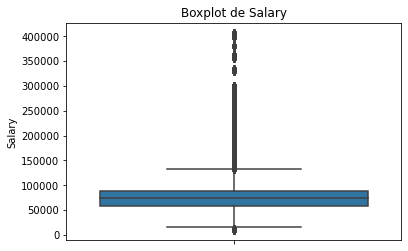

In [ ]:
# A continuación, gestionamos los valores nulos de la columna 'Salary'. 
# Producimos un boxplot y comprobamos que hay muchos valores atípicos.

sns.boxplot(y='Salary', data = df_final)
plt.title('Boxplot de Salary')


In [122]:
# Vamos a imputar los valores nulos de Salary por la mediana, ya que hay muchos valores atípicos.

imputer_salary = SimpleImputer(strategy = "median")
salary_imputado = imputer_salary.fit_transform(df_final[["Salary"]])
salary_imputado
df_final["Salary"] = salary_imputado

# Comprobamos que no quedan registros nulos. 

print(f"Después del 'SimpleImputer' tenemos {df_final['Salary'].isnull().sum()} nulos")


Después del 'SimpleImputer' tenemos 0 nulos


In [137]:
# Finalmente, hacemos una última exploración del dataframe. 
exploracion_dataframe(df_final)

Número de filas: 403760. Número de columnas: 25

 ..................... 

Número de duplicados: 0

 ..................... 

Porcentaje de nulos:


,%_nulos



 ..................... 

Tipos de columnas:


,tipo_dato
Loyalty_Number,int64
Year,int64
Month,int64
Flights_Booked,int64
Flights_With_Companions,int64
Total_Flights,int64
Distance,int64
Points_Accumulated,float64
Points_Redeemed,int64
Dollar_Cost_Points_Redeemed,int64



 ..................... 

Valores de las columnas categóricas: 
La columna COUNTRY tiene las siguientes valores únicos:


,Country
Canada,403760


La columna PROVINCE tiene las siguientes valores únicos:


,Province
Ontario,130258
British Columbia,106442
Quebec,79573
Alberta,23360
Manitoba,15900
New Brunswick,15352
Nova Scotia,12507
Saskatchewan,9861
Newfoundland,6244
Yukon,2679


La columna CITY tiene las siguientes valores únicos:


,City
Toronto,80775
Vancouver,62314
Montreal,49687
Winnipeg,15900
Whistler,13994
Halifax,12507
Ottawa,12262
Edmonton,11768
Trenton,11710
Quebec City,11698


La columna POSTAL_CODE tiene las siguientes valores únicos:


,Postal_Code
V6E 3D9,21944
V5R 1W3,16529
V6T 1Y8,13994
V6E 3Z3,13128
M2M 7K8,12855
P1J 8T7,12093
H2T 9K8,12000
K8V 4B2,11710
G1B 3L5,11698
H2T 2J6,10747


La columna GENDER tiene las siguientes valores únicos:


,Gender
Female,202757
Male,201003


La columna EDUCATION tiene las siguientes valores únicos:


,Education
Bachelor,252567
College,102260
High School or Below,18915
Doctor,17731
Master,12287


La columna MARITAL_STATUS tiene las siguientes valores únicos:


,Marital_Status
Married,234845
Single,108153
Divorced,60762


La columna LOYALTY_CARD tiene las siguientes valores únicos:


,Loyalty_Card
Star,183745
Nova,136883
Aurora,83132


La columna ENROLLMENT_TYPE tiene las siguientes valores únicos:


,Enrollment_Type
Standard,380419
2018 Promotion,23341



 ..................... 

Valores de las columnas numéricas: 
La columna LOYALTY_NUMBER tiene las siguientes valores únicos:


,Loyalty_Number
974875,48
736504,48
890702,48
617489,48
200519,47
...,...
428402,24
428452,24
428520,24
428523,24


La columna YEAR tiene las siguientes valores únicos:


,Year
2018,202022
2017,201738


La columna MONTH tiene las siguientes valores únicos:


,Month
11,33663
10,33662
12,33662
9,33659
8,33655
7,33648
6,33646
4,33640
5,33640
3,33634


La columna FLIGHTS_BOOKED tiene las siguientes valores únicos:


,Flights_Booked
0,196128
3,18228
11,15705
5,15084
7,14561
8,14357
9,14164
6,13847
2,13641
10,13363


La columna FLIGHTS_WITH_COMPANIONS tiene las siguientes valores únicos:


,Flights_With_Companions
0,295023
2,19272
3,19015
1,17905
4,13665
5,13424
6,9911
7,7089
8,3965
9,2944


La columna TOTAL_FLIGHTS tiene las siguientes valores únicos:


,Total_Flights
0,196128
6,15273
10,14393
8,14056
4,13656
2,13032
12,12409
11,12300
9,10688
13,10499


La columna DISTANCE tiene las siguientes valores únicos:


,Distance
0,196128
2520,410
2880,401
1680,389
2160,365
...,...
1333,1
3722,1
3985,1
4779,1


La columna POINTS_ACCUMULATED tiene las siguientes valores únicos:


,Points_Accumulated
0.00,196128
180.00,763
270.00,734
288.00,717
189.00,709
...,...
658.50,1
556.25,1
10.80,1
565.50,1


La columna POINTS_REDEEMED tiene las siguientes valores únicos:


,Points_Redeemed
0,379579
447,103
523,100
443,98
516,97
...,...
834,1
858,1
862,1
869,1


La columna DOLLAR_COST_POINTS_REDEEMED tiene las siguientes valores únicos:


,Dollar_Cost_Points_Redeemed
0,379579
36,1037
38,1001
40,993
42,983
39,943
44,923
41,913
37,887
43,877


La columna SALARY tiene las siguientes valores únicos:


,Salary
73479.0,102308
101933.0,552
61809.0,336
51573.0,336
62283.0,336
...,...
22425.0,24
58153.0,24
57156.0,24
40991.0,24


La columna CLV tiene las siguientes valores únicos:


,Clv
8564.77,312
14024.36,311
4330.39,309
3873.65,308
25464.82,305
...,...
2511.94,24
3657.59,24
6656.20,24
5052.38,24


La columna ENROLLMENT_YEAR tiene las siguientes valores únicos:


,Enrollment_Year
2018,72401
2017,60038
2016,59294
2013,57796
2014,57067
2015,56269
2012,40895


La columna ENROLLMENT_MONTH tiene las siguientes valores únicos:


,Enrollment_Month
5,36314
12,35635
7,35544
11,34867
10,34817
8,34439
6,34008
9,33667
4,33493
3,32727


La columna CANCELLATION_YEAR tiene las siguientes valores únicos:


,Cancellation_Year
0,354110
2018,15519
2017,12147
2016,10248
2015,6360
2014,4344
2013,1032


La columna CANCELLATION_MONTH tiene las siguientes valores únicos:


,Cancellation_Month
0,354110
12,5112
11,5095
8,4992
7,4480
10,4322
9,4224
6,3960
1,3727
3,3579



 ..................... 

Principales valores estadísticos son:
                                count           mean            std        min        25%        50%        75%        max
Loyalty_Number               403760.0  549875.383713  258961.514684  100018.00  326699.00  550598.00  772152.00  999986.00
Year                         403760.0    2017.500352       0.500000    2017.00    2017.00    2018.00    2018.00    2018.00
Month                        403760.0       6.501335       3.451982       1.00       4.00       7.00      10.00      12.00
Flights_Booked               403760.0       4.134050       5.230064       0.00       0.00       1.00       8.00      21.00
Flights_With_Companions      403760.0       1.036569       2.080472       0.00       0.00       0.00       1.00      11.00
Total_Flights                403760.0       5.170619       6.526858       0.00       0.00       1.00      10.00      32.00
Distance                     403760.0    1214.460979    1434.098521       0

In [138]:
# Por último, ordenamos las columnas por orden alfabético para desplazarnos más cómodamente por el dataframe.

df_final = df_final.reindex(sorted(df_final.columns), axis=1)
df_final.sample(1)

,Cancellation_Month,Cancellation_Year,City,Clv,Country,Distance,Dollar_Cost_Points_Redeemed,Education,Enrollment_Month,Enrollment_Type,Enrollment_Year,Flights_Booked,Flights_With_Companions,Gender,Loyalty_Card,Loyalty_Number,Marital_Status,Month,Points_Accumulated,Points_Redeemed,Postal_Code,Province,Salary,Total_Flights,Year
293598,0,0,St. John's,4334.06,Canada,0,0,Master,4,Standard,2017,0,0,Female,Star,512897,Single,6,0.0,0,A1C 6H9,Newfoundland,114551.0,0,2018


In [139]:
# Guardamos el dataframe definitivo a .csv

df_final.to_csv("Merged_And_Clean.csv", index = False)

## Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

### 1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


**Comprobamos que los dos años muestran una tendencia similar, con tres picos que parecen corresponder a las vacaciones escolares: marzo (mid-winter break), julio (vacaciones estivales y diciembre (vacaciones navideñas).**

Text(0.5, 1.0, 'Monthly Trends in Flights Booked by Month/Year')

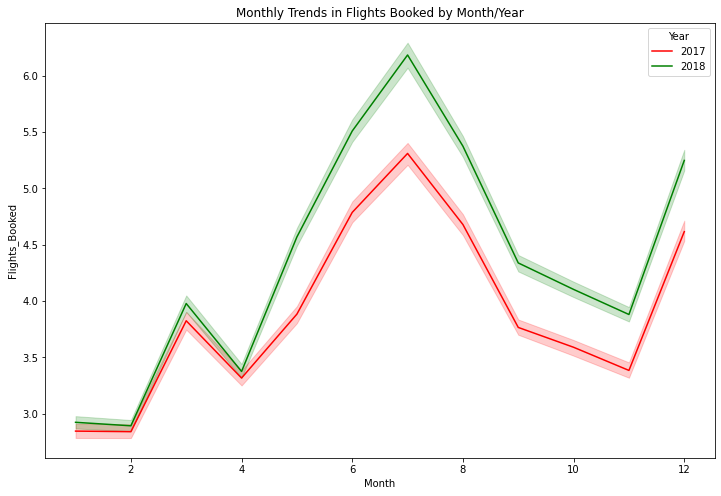

In [140]:
# El lineplot es una buena opción para mostrar cambios a lo largo del tiempo

plt.figure(figsize=(12, 8))
sns.lineplot(x='Month', y='Flights_Booked', hue = "Year", data=df_final, palette= ["red", "green"])
plt.title('Monthly Trends in Flights Booked by Month/Year')


### 2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


**Vemos que existe una relación directa clara entre la distancia recorrida y los puntos acumulados: a mayor distancia, más puntos. Los titulares de la tarjeta Aurora son los que más puntos acumulan y los de la tarjeta Star, los que menos. Podríamos deducir que la tarjeta Aurora, por tanto, es de un nivel superior a las demás.**

Text(0.5, 1.0, 'Scatterplot of Distance vs Points Accumulated by Loyalty Card')

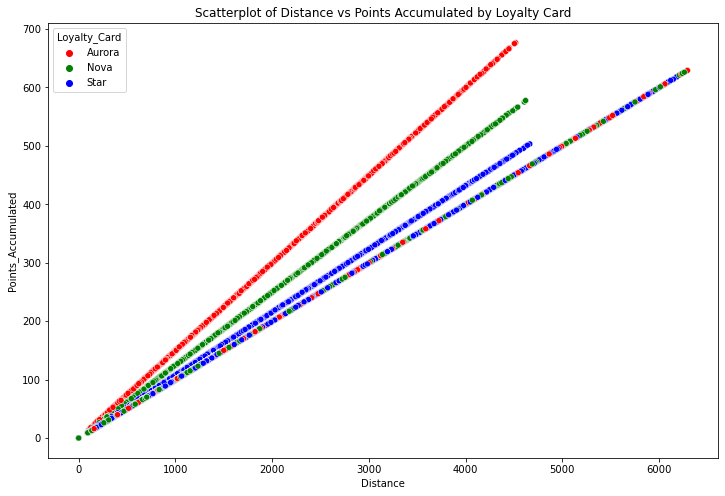

In [ ]:
# Creamos un scatterplot porque es un gráfico ideal para relacionar dos variables numéricas

plt.figure(figsize=(12, 8))
sns.scatterplot(x = 'Distance', y = 'Points_Accumulated', hue= 'Loyalty_Card', data=df_final, palette=['red', 'green', 'blue'])
plt.title('Scatterplot of Distance vs Points Accumulated by Loyalty Card')


### 3. ¿Cuál es la distribución de los clientes por provincia o estado?


**Observamos que las provincias con mayor número de clientes son Ontario, British Columbia y Quebec, mientras que Yukon y Prince Edward Island con las provincias
con un menor número de clientes.**

In [141]:
# Primero hacemos una agrupación de clientes por provincia y ordenamos los resultados de mayor a menor.

df_province = df_final.groupby('Province')['Loyalty_Number'].count().reset_index().sort_values(by='Loyalty_Number', ascending=False)
df_province

,Province,Loyalty_Number
6,Ontario,130258
1,British Columbia,106442
8,Quebec,79573
0,Alberta,23360
2,Manitoba,15900
3,New Brunswick,15352
5,Nova Scotia,12507
9,Saskatchewan,9861
4,Newfoundland,6244
10,Yukon,2679


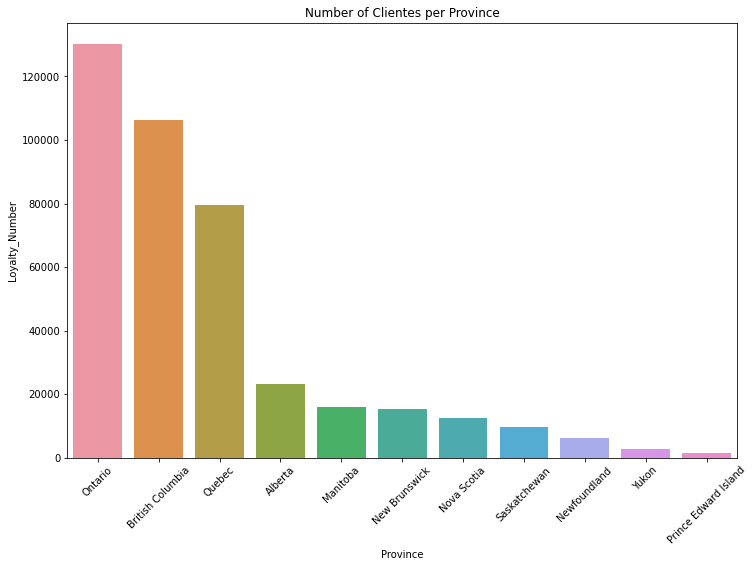

In [142]:
# A continuación, creamos un barplot, un diagrama útil para comparar categorías diferentes.

plt.figure(figsize =(12,8)) 
sns.barplot(x = "Province", y = "Loyalty_Number", data = df_province)
plt.xticks(rotation = 45)
plt.title("Number of Clientes per Province");

### 4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


**Vemos que a mayor nivel educativo, mayor salario, siendo el salario medio de la categoría "Doctor" significativamente más alto que los demás. Tenemos que tener en cuenta
otro aspecto: la categoría "College" parece estar ligeramente por delante de la categoría "Bachelor" en cuanto a salario, lo cual no termina de cuadrar pues Bachelor es un 
nivel educativo superior al College. Esto podría deberse a que en el df original todos los salarios de la categoría College eran nulos e imputamos por la mediana (= 73479).**

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Doctor'),
  Text(1, 0, 'Master'),
  Text(2, 0, 'College'),
  Text(3, 0, 'Bachelor'),
  Text(4, 0, 'High School or Below')])

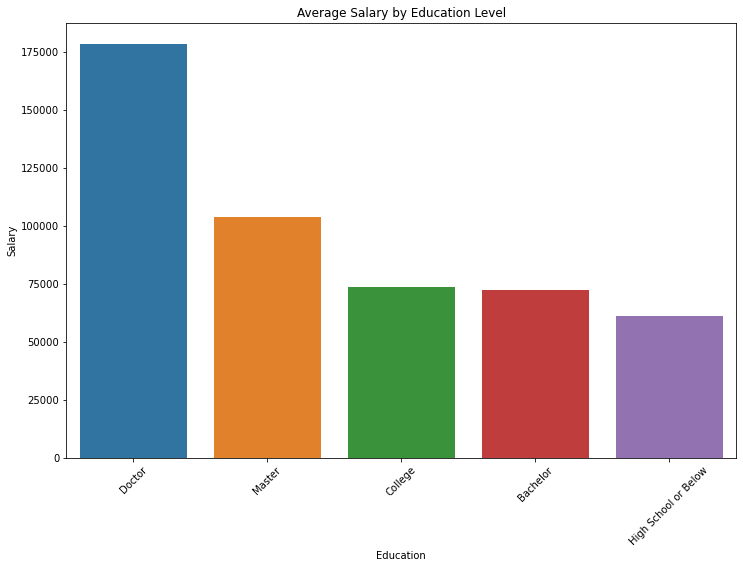

In [143]:
# Hacemos una agrupación de salarios medios por nivel de educación y ordenamos.

df_education = df_final.groupby("Education")["Salary"].mean().reset_index().sort_values(by = "Salary", ascending = False)

# A continuación, hacemos un gráfico de barras, que nos permite comparar variables numéricas con categóricas.
plt.figure(figsize =(12,8))
sns.barplot(x = "Education", y = "Salary", data = df_education)
plt.title("Average Salary by Education Level")
plt.xticks(rotation = 45)

In [ ]:
# Comprobamos que, efectivamente, a todos los clientes de nivel College se les asignó un salario de 73479 y que la media del salario de los clientes de nivel Bachelor
# es ligeramente inferior. Sería una cuestión a tratar con el cliente.

df_final.loc[df_final["Education"] == "College"].sample(5)
mean_salary_college = df_final[df_final["Education"] == "College"]["Salary"].mean()
print("El salario medio de los clientes de nivel College es:", mean_salary_college)

mean_salary_bachelor = df_final[df_final['Education'] == 'Bachelor']['Salary'].mean()
print("El salario medio de los clientes de nivel Bachelor es:", mean_salary_bachelor)

El salario medio de los clientes de nivel College es: 73479.0
El salario medio de los clientes de nivel Bachelor es: 72599.08091318344


In [ ]:
""" También podríamos crear un nuevo gráfico que excluya a los clientes con nivel College.

df_education2 = df_final.groupby("Education")["Salary"].mean().reset_index().sort_values(by = "Salary", ascending = False)

sns.barplot(x = "Education", y = "Salary", data = df_education2[df_education2["Education"] != "College"])
plt.title("Average Salary by Education Level Excluding College")
plt.xticks(rotation = 45)"""

### 5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


**Hay un número significativamente mayor de clientes con la tarjeta Star. La tarjeta Aurora, que parece ser la más exclusiva pues ofrece más puntos por 
distancia recorrida (como hemos visto en un apartado anterior), es la que menos clientes tiene.**

In [144]:
# Hacemos una agrupación de tarjetas de fidelidad por número de cliente.  

df_cards = df_final.groupby(['Loyalty_Card'])['Loyalty_Number'].count().reset_index()
df_cards


,Loyalty_Card,Loyalty_Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


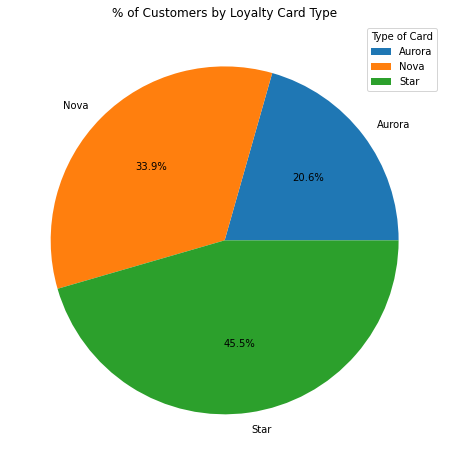

In [145]:
# Creamos un piechart, que nos permite mostrar la composición de una categoría. Este tipo de gráficos hay que utilizarlos con precaución cuando hay muchos segmentos de pequeñas
# dimensiones. En este caso, es adecuado pues tenemos tan solo 3 segmentos con amplias proporciones. 

plt.figure(figsize=(8, 8))
plt.pie(df_cards['Loyalty_Number'], labels=df_cards['Loyalty_Card'], autopct='%1.1f%%')
plt.title("% of Customers by Loyalty Card Type")
plt.legend(df_cards['Loyalty_Card'], title="Type of Card");
plt.show()

### 6. ¿Cómo se distribuyen los clientes según su estado civil y género?

**La gran mayoría de clientes están casados y una minoría de ellos están divorciados, no habiendo una diferencia significativa entre hombres y mujeres.**

In [146]:
# Agrupamos los clientes por estado civil y género 
df_grouped = df_final.groupby(['Marital_Status', 'Gender'])['Loyalty_Number'].count().reset_index()
df_grouped

,Marital_Status,Gender,Loyalty_Number
0,Divorced,Female,30634
1,Divorced,Male,30128
2,Married,Female,117363
3,Married,Male,117482
4,Single,Female,54760
5,Single,Male,53393


(array([0, 1, 2]),
 [Text(0, 0, 'Divorced'), Text(1, 0, 'Married'), Text(2, 0, 'Single')])

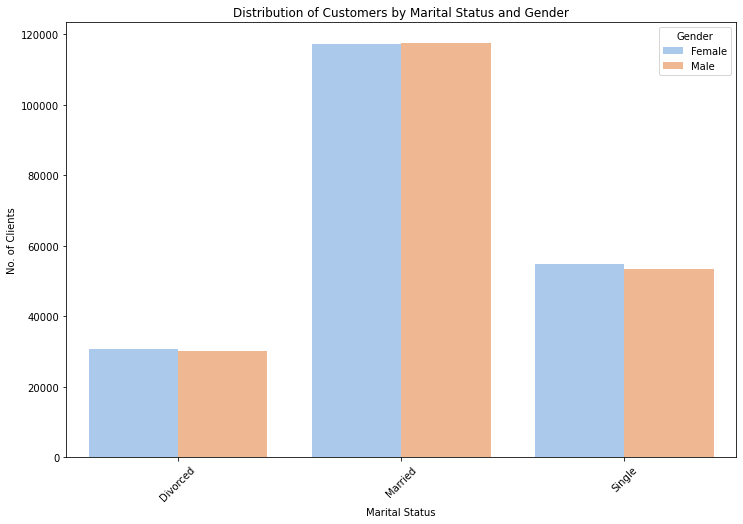

In [147]:
# Creamos un gráfico de barras.

plt.figure(figsize=(12, 8))
sns.barplot(x='Marital_Status', y='Loyalty_Number', hue='Gender', data=df_grouped, palette='pastel')
plt.title('Distribution of Customers by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('No. of Clients')
plt.legend(title='Gender')
plt.xticks(rotation=45)


## Fase 3: Evaluación de diferencias en reservas de vuelos por nivel educativo

Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos
compartido, se busca evaluar si existen diferencias significativas en el
número de vuelos reservados según el nivel educativo de los clientes.
Para ello, los pasos que deberás seguir son:


### 1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.


In [148]:
df_filtered = df_final[["Flights_Booked", "Education"]]
df_filtered.sample(10)

,Flights_Booked,Education
395296,8,Master
161311,8,Bachelor
294008,0,Bachelor
287762,0,Bachelor
177389,0,Bachelor
193039,0,College
346037,0,Bachelor
344791,0,Doctor
355547,13,Doctor
247568,10,College


In [149]:
df_filtered["Education"].value_counts()

Bachelor                252567
College                 102260
High School or Below     18915
Doctor                   17731
Master                   12287
Name: Education, dtype: int64

### 2. Análisis Descriptivo: 
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación
estandar, los percentiles) del número de vuelos reservados para cada grupo.


In [150]:
basic_stats = df_final.groupby('Education')['Flights_Booked'].describe()
basic_stats

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Bachelor,252567.0,4.110288,5.221671,0.0,0.0,1.0,8.0,21.0
College,102260.0,4.169744,5.246040,0.0,0.0,1.0,8.0,21.0
Doctor,17731.0,4.175512,5.256971,0.0,0.0,1.0,8.0,21.0
High School or Below,18915.0,4.176209,5.239267,0.0,0.0,1.0,8.0,21.0
Master,12287.0,4.200700,5.213956,0.0,0.0,1.0,8.0,21.0


In [151]:
more_basic_stats = df_final.groupby("Education")["Flights_Booked"].agg(["median", "var", "min"])
more_basic_stats

,median,var,min
Education,,,
Bachelor,1.0,27.265843,0
College,1.0,27.520938,0
Doctor,1.0,27.635748,0
High School or Below,1.0,27.449915,0
Master,1.0,27.185339,0


In [112]:
# Comprobamos que 196.128 registros son ceros.
zero_count = df_final['Flights_Booked'].value_counts().get(0, 0)
print(zero_count)

196128


In [113]:
# Estos ceros están desigualmente según el nivel educativo. Pero no los eliminamos, pues los ceros (al contrario que los valores nulos) aportan información valiosa y por tanto
# han de ser tenidos en cuenta al hacer pruebas estadísticas.

zeros_per_education = df_final[df_final['Flights_Booked'] == 0].groupby('Education').size()
print(zeros_per_education)

Education
Bachelor                123264
College                  49426
Doctor                    8538
High School or Below      9060
Master                    5840
dtype: int64


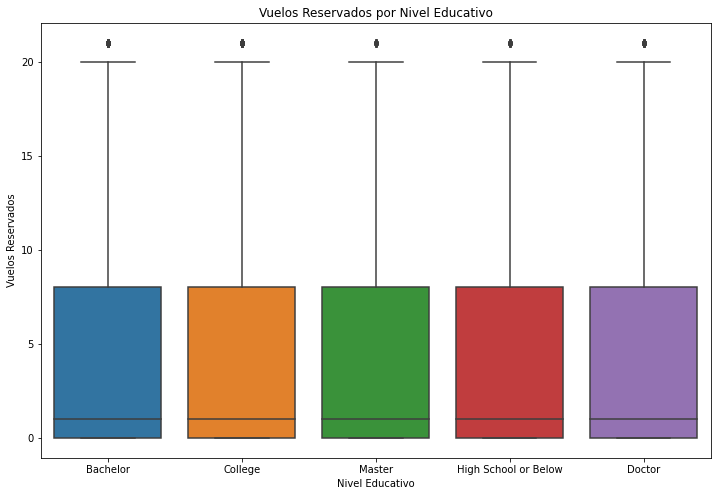

In [152]:
# Hacemos un boxplot para visualizar los resultados:

plt.figure(figsize=(12, 8))
sns.boxplot(x='Education', y='Flights_Booked', data=df_final)
plt.title('Vuelos Reservados por Nivel Educativo')
plt.xlabel('Nivel Educativo')
plt.ylabel('Vuelos Reservados')
plt.show()

### 3. Prueba Estadística:
Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos
reservados entre los diferentes niveles educativos.

In [153]:
# Vamos a realizar una prueba de A/B Testing. Para ello planteamos dos hipótesis:
# - Hipótesis nula (H0): No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos. 
# - Hipótesis alternativa (H1): Existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [154]:
# Primero, comprobamos si la distribución es normal. Para ello aplicaremos el test de Kolmogorov-Smirnov.
def normalidad(dataframe, columna):

    statistic, p_value = kstest(dataframe[columna], 'norm')
    
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")
        
normalidad(df_final, 'Flights_Booked')

Para la columna Flights_Booked los datos no siguen una distribución normal.


In [155]:
# La distribución no es normal, por lo que pasamos a realizar la prueba de Kruskal_Wallis.

from scipy.stats import kruskal

# Agrupar los datos por nivel educativo
groups = [df_final[df_final['Education'] == level]['Flights_Booked'].values for level in df_final['Education'].unique()]

# Aplicar la prueba de Kruskal-Wallis
stat, p_value = kruskal(*groups)

# Resultados
print(f'Valor p: {p_value}')

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Hay diferencia en el número de vuelos reservados entre los diferentes niveles educativos, por lo que rechazamos la hipótesis nula.")
else:
    print("No hay una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos, por lo que no podemos rechazar la hipótesis nula.")


Valor p: 0.0015225470219889367
Hay diferencia en el número de vuelos reservados entre los diferentes niveles educativos, por lo que rechazamos la hipótesis nula.


**Sorprendentemente, y aunque las métricas y visualizaciones parecen indicar lo contrario, los resultados de las diferentes pruebas indican que sí existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos, por lo que apoyamos la hipótesis alternativa (H1).**